# **Distribución de Poisson**

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import scipy.stats as st
from itertools import accumulate
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D

**Paso 1.** Defina las variables que intervienen en el modelo.

Se dice que una variable aleatoria $x,y$ tiene una distribución de Poisson si su función de densidad de probabilidad está dada por:

**Paso 2.** Formule la distribución de probabilidad de cada variable.

$$
p(x,y)=\frac{λ_1^xe^{-λ_1}*λ_2^ye^{-λ_2}}{x!y!}
$$

**Paso 3.** Enumere la distribución acumulada de probabilidad de cada variable.

$$
F(x,y)=\sum_{i=0}^{x}\sum_{j=0}^{y} \frac{λ_1^ie^{-λ_1}*λ_2^je^{-λ_2}}{i!j!}
$$

**Paso 4.** Establezca el intervalo de números aleatorios correspondiente a cada valor de cada una de las variables.

|  Variable |    x    |    y    |
|-----------|---------|---------|
| Intervalo | $𝐙^++0$ | $𝐙^++0$ |

<ipython-input-13-7cadb1b6b2f2>:14: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  (lambda_x ** X[i, j]) / np.math.factorial(X[i, j]) *  # Parte de X
<ipython-input-13-7cadb1b6b2f2>:15: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  (lambda_y ** Y[i, j]) / np.math.factorial(Y[i, j]))  # Parte de Y


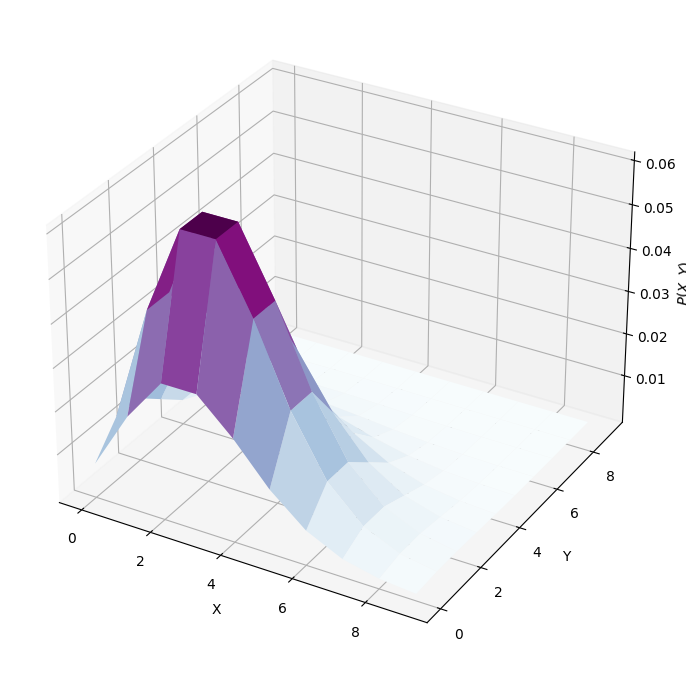

In [13]:
# PASO 5: Genere números aleatorios.
# PASO 6: Simule la función

def bivariate_poisson(X, Y, lambda_x=1.0, lambda_y=1.0):
    """
    Distribución bivariada de Poisson para las matrices *X* y *Y*.
    """
    Z = np.zeros(X.shape)  # Matriz para almacenar las probabilidades

    # Calcular la probabilidad para cada par (x, y)
    for i in range(len(X)):
        for j in range(len(Y)):
            Z[i, j] = (np.exp(-lambda_x - lambda_y) *  # Factor de normalización
                       (lambda_x ** X[i, j]) / np.math.factorial(X[i, j]) *  # Parte de X
                       (lambda_y ** Y[i, j]) / np.math.factorial(Y[i, j]))  # Parte de Y
    return Z

def plot_dist(x, y):
    ''' Entorno de graficación que utilizamos frecuentemente para visualizar los
    algoritmos de muestreo.'''

    sns.set_style('white')  # Estilo de la gráfica
    plt.rcdefaults()  # Configuración por defecto de Matplotlib

    # Graficar el contorno
    g = sns.JointGrid(x=x, y=y, height=10).plot_joint(sns.kdeplot, n_levels=4, cmap="BuPu", shade=True, shade_lowest=False)

    # Agregar gráfico de dispersión de los datos
    g = g.plot_joint(plt.scatter, c="r", s=30, linewidth=1)
    plt.plot(x, y, linestyle='-', marker='', alpha=0.4)

    # Configurar etiquetas de los ejes
    g.set_axis_labels("$X$", "$Y$")

def traceplot(x):
    ''' Gráfico de trazas en la dimensión x con la media acumulativa (r)
    y la media real (--)'''
    sns.tsplot(x)  # Gráfico de la serie temporal
    l = list(np.cumsum(x))  # Sumar acumulativamente los valores
    nl = [v/i for i, v in enumerate(l, 1)]  # Calcular la media acumulativa
    plt.plot(nl, 'r')  # Graficar la media acumulativa
    plt.axhline(y=0.0, color='k', linestyle='--')  # Línea horizontal en 0
    plt.ylabel('x')
    plt.xlabel('Iteración')

def autocorrelation_plot(x, l):
    ''' Grafica la autocorrelación de x hasta un retraso = l '''
    plt.acorr(x - np.mean(x), maxlags=l, normed=True, usevlines=False)  # Graficar autocorrelación
    plt.xlim((0, 100))  # Limitar el eje x
    plt.ylabel('Autocorrelación')
    plt.xlabel('Retraso')

# Definir parámetros lambda para la distribución bivariada de Poisson
lambda_x = 3.0
lambda_y = 2.0

# Crear la cuadrícula para el gráfico 3D
x = np.arange(0, 10)  # Rango para los valores de X
y = np.arange(0, 10)  # Rango para los valores de Y
X, Y = np.meshgrid(x, y)  # Crear la cuadrícula de coordenadas

# Generar la distribución bivariada de Poisson
Z = bivariate_poisson(X, Y, lambda_x, lambda_y)

# Graficar la superficie en 3D
fig = plt.figure(figsize=(12, 8.5))  # Tamaño de la figura
ax = fig.add_subplot(111, projection='3d')  # Crear un eje 3D
ax.plot_surface(X, Y, Z, cmap='BuPu')  # Graficar la superficie

# Configurar etiquetas de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('$P(X,Y)$')
plt.show()  # Mostrar la gráfica

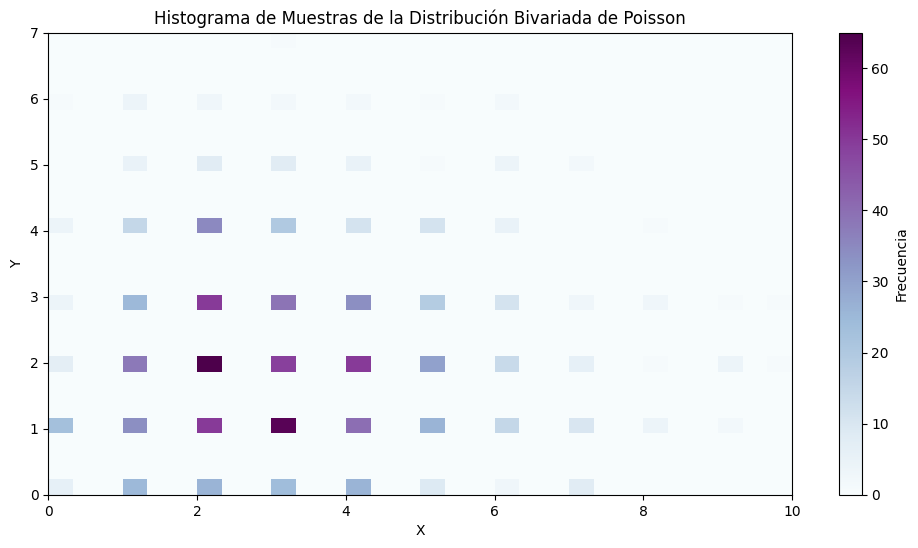

In [14]:
# PASO 7. Obtenga la gráfica y el histograma.

# Generar muestras aleatorias de la distribución bivariada de Poisson
num_samples = 1000  # Número de muestras
X_samples = np.random.poisson(lambda_x, num_samples)  # Muestras para X
Y_samples = np.random.poisson(lambda_y, num_samples)  # Muestras para Y

# Crear un histograma de las muestras
plt.figure(figsize=(12, 6))
plt.hist2d(X_samples, Y_samples, bins=[30, 30], cmap='BuPu')  # Histograma 2D
plt.colorbar(label='Frecuencia')  # Barra de color para la frecuencia
plt.title('Histograma de Muestras de la Distribución Bivariada de Poisson')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()  # Mostrar el histograma

In [17]:
# PASO 8. Calcule la media del área bajo la curva de la función y su desviación estándar.

# Cálculo de la media y la desviación estándar usando NumPy
mean_X_numpy = np.mean(X_samples)
std_dev_X_numpy = np.std(X_samples, ddof=1)  # ddof=1 para obtener la desviación estándar muestral

mean_Y_numpy = np.mean(Y_samples)
std_dev_Y_numpy = np.std(Y_samples, ddof=1)

print(f'Media de X (NumPy): {mean_X_numpy:.2f}')
print(f'Desviación estándar de X (NumPy): {std_dev_X_numpy:.2f}')
print(f'Media de Y (NumPy): {mean_Y_numpy:.2f}')
print(f'Desviación estándar de Y (NumPy): {std_dev_Y_numpy:.2f}')

Media de X (NumPy): 3.08
Desviación estándar de X (NumPy): 1.82
Media de Y (NumPy): 2.04
Desviación estándar de Y (NumPy): 1.39


<ipython-input-13-7cadb1b6b2f2>:14: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  (lambda_x ** X[i, j]) / np.math.factorial(X[i, j]) *  # Parte de X
<ipython-input-13-7cadb1b6b2f2>:15: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  (lambda_y ** Y[i, j]) / np.math.factorial(Y[i, j]))  # Parte de Y
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


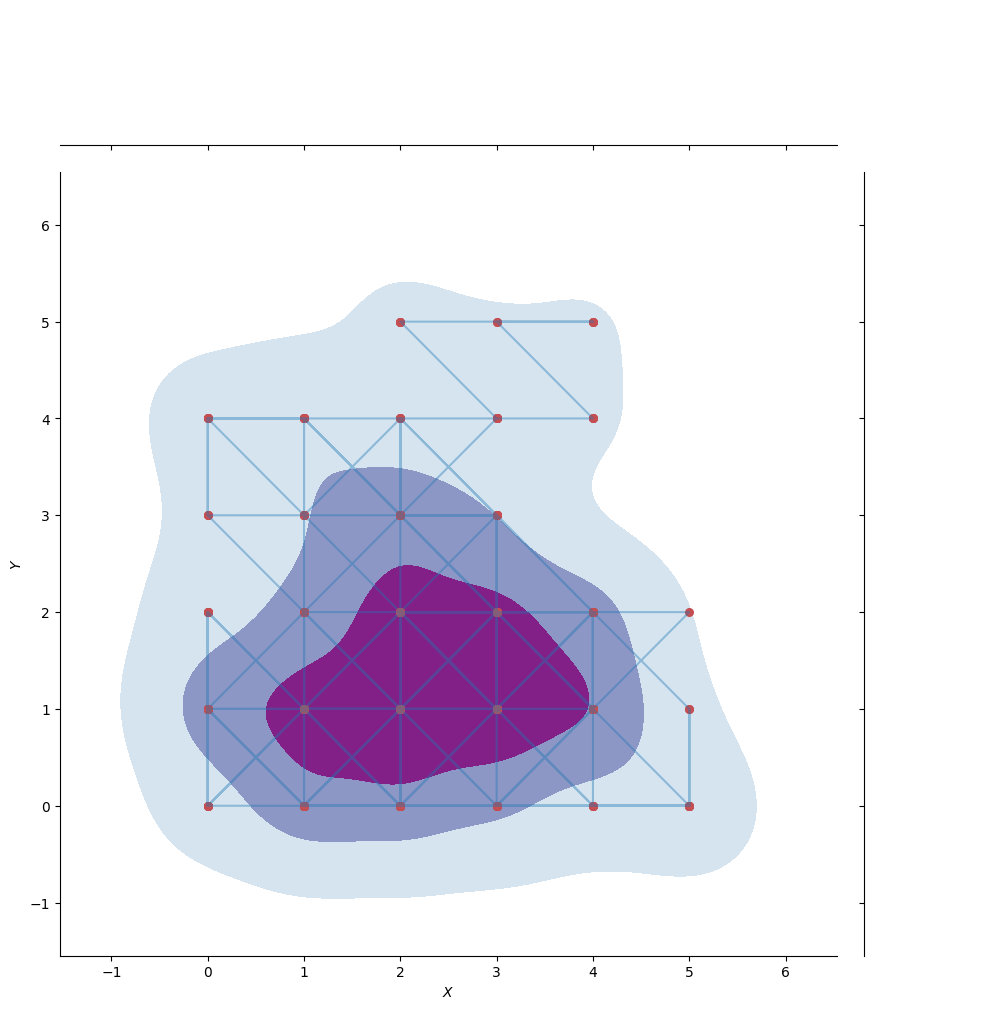

In [19]:
mean = np.array([lambda_x, lambda_y])  # Media
var = np.array([[lambda_x, 0], [0, lambda_y]])  # Varianza, consideramos varianzas independientes

def ptarget(x, y):
    # Usar la función de densidad de probabilidad de la bivariada de Poisson
    return bivariate_poisson(np.array([[x]]), np.array([[y]]), lambda_x, lambda_y)[0][0]

def metropolis_hastings(p, n, x0, y0, step):
    x = x0
    y = y0

    points = np.zeros((n, 2))  # Lista inicial de muestras, al momento, con puros ceros

    for i in range(n):

        # Proponemos nuevos valores para el estado actual mediante el muestreo Q(x',y' | x,y)
        x_star = max(0, x + np.random.randint(-step, step + 1))  # Desplazamiento entero en x, no negativo
        y_star = max(0, y + np.random.randint(-step, step + 1))  # Desplazamiento entero en y, no negativo

        # Condición de Metropolis-Hastings
        if np.random.rand() < p(x_star, y_star) / p(x, y):
            x, y = x_star, y_star

        # Se actualiza la lista de muestras
        points[i] = np.array([x, y])

    return points

# Generar las muestras
samples = metropolis_hastings(ptarget, 300, 0, 0, 1)

# Visualizar
plot_dist(samples[:, 0], samples[:, 1])
plt.savefig('caminates.png')

# **Distribución Exponencial**

**Paso 1.** Defina las variables que intervienen en el modelo.

Se dice que una variable aleatoria $x,y$ tiene una distribución exponencial si su función de densidad de probabilidad está dada por:

**Paso 2.** Formule la distribución de probabilidad de cada variable.

$$
f(x,y)=λ_1λ_2e^{-λ_1x-λ_2y}
$$

**Paso 3.** Enumere la distribución acumulada de probabilidad de cada variable.

$$
F(x,y)=1-e^{-λ_1x}-e^{-λ_2y}+e^{-λ_1x-λ_2y}
$$

**Paso 4.** Establezca el intervalo de números aleatorios correspondiente a cada valor de cada una de las variables.

|  Variable |    x    |    y    |
|-----------|---------|---------|
| Intervalo | $[0,∞)$ | $[0,∞)$ |

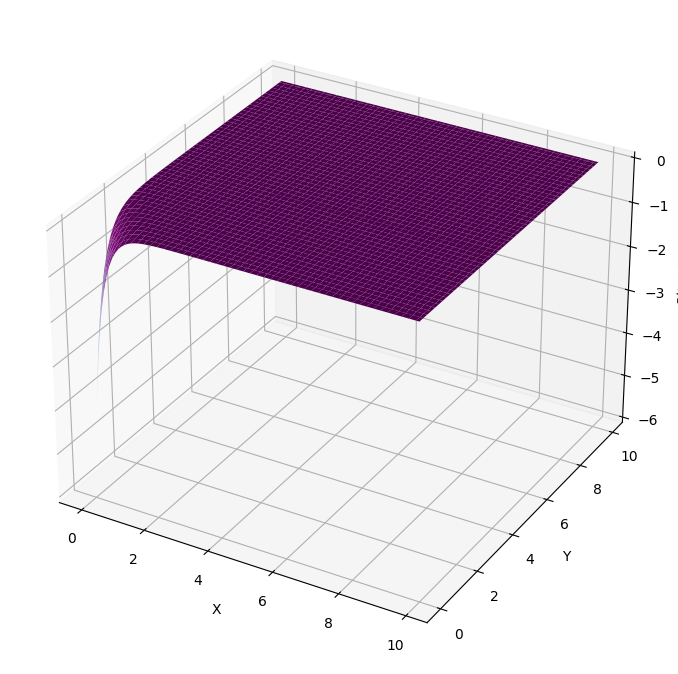

In [21]:
# PASO 5: Genere números aleatorios.
# PASO 6: Simule la función

def bivariate_exponential(X, Y, lambda_x=1.0, lambda_y=1.0):
    """
    Distribución bivariada exponencial para las matrices *X* y *Y*.
    """
    Z = np.zeros(X.shape)  # Matriz para almacenar las probabilidades

    # Calcular la probabilidad para cada par (x, y)
    for i in range(len(X)):
        for j in range(len(Y)):
            if X[i, j] >= 0 and Y[i, j] >= 0:  # Asegurarse de que x y y son no negativos
                Z[i, j] = -lambda_x * lambda_y * np.exp(-lambda_x * X[i, j] - lambda_y * Y[i, j])
    return Z

def plot_dist(x, y):
    ''' Entorno de graficación que utilizamos frecuentemente para visualizar los
    algoritmos de muestreo.'''

    sns.set_style('white')  # Estilo de la gráfica
    plt.rcdefaults()  # Configuración por defecto de Matplotlib

    # Graficar el contorno
    g = sns.JointGrid(x=x, y=y, height=10).plot_joint(sns.kdeplot, n_levels=4, cmap="BuPu", shade=True, shade_lowest=False)

    # Agregar gráfico de dispersión de los datos
    g = g.plot_joint(plt.scatter, c="r", s=30, linewidth=1)
    plt.plot(x, y, linestyle='-', marker='', alpha=0.4)

    # Configurar etiquetas de los ejes
    g.set_axis_labels("$X$", "$Y$")

def traceplot(x):
    ''' Gráfico de trazas en la dimensión x con la media acumulativa (r)
    y la media real (--)'''
    sns.tsplot(x)  # Gráfico de la serie temporal
    l = list(np.cumsum(x))  # Sumar acumulativamente los valores
    nl = [v/i for i, v in enumerate(l, 1)]  # Calcular la media acumulativa
    plt.plot(nl, 'r')  # Graficar la media acumulativa
    plt.axhline(y=0.0, color='k', linestyle='--')  # Línea horizontal en 0
    plt.ylabel('x')
    plt.xlabel('Iteración')

def autocorrelation_plot(x, l):
    ''' Grafica la autocorrelación de x hasta un retraso = l '''
    plt.acorr(x - np.mean(x), maxlags=l, normed=True, usevlines=False)  # Graficar autocorrelación
    plt.xlim((0, 100))  # Limitar el eje x
    plt.ylabel('Autocorrelación')
    plt.xlabel('Retraso')

# Definir parámetros lambda para la distribución bivariada exponencial
lambda_x = 3.0
lambda_y = 2.0

# Crear la cuadrícula para el gráfico 3D
x = np.arange(0, 10, 0.1)  # Rango para los valores de X
y = np.arange(0, 10, 0.1)  # Rango para los valores de Y
X, Y = np.meshgrid(x, y)  # Crear la cuadrícula de coordenadas

# Generar la distribución bivariada exponencial
Z = bivariate_exponential(X, Y, lambda_x, lambda_y)

# Graficar la superficie en 3D
fig = plt.figure(figsize=(12, 8.5))  # Tamaño de la figura
ax = fig.add_subplot(111, projection='3d')  # Crear un eje 3D
ax.plot_surface(X, Y, Z, cmap='BuPu')  # Graficar la superficie

# Configurar etiquetas de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('$P(X,Y)$')
plt.show()  # Mostrar la gráfica

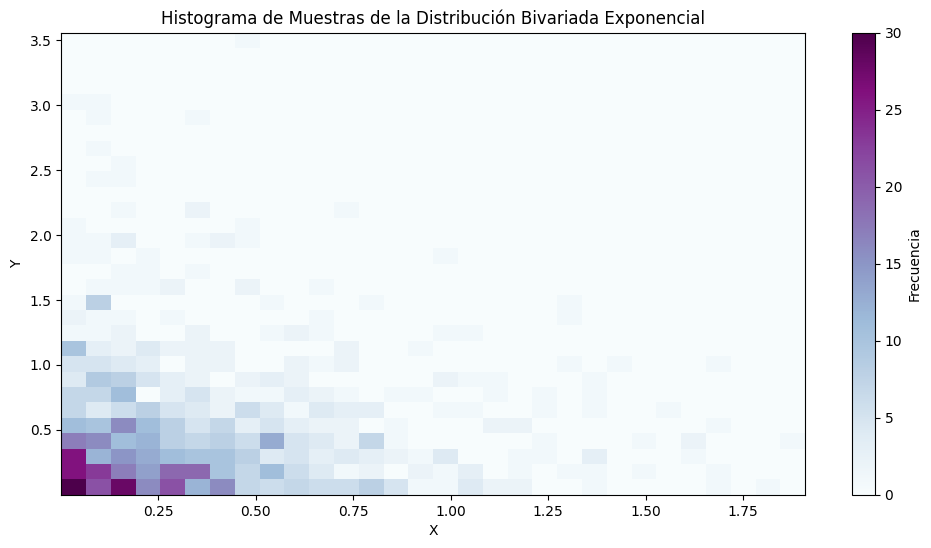

In [22]:
# PASO 7. Obtenga la gráfica y el histograma.

# Generar muestras aleatorias de la distribución bivariada exponencial
num_samples = 1000  # Número de muestras

# Generar muestras independientes de la distribución exponencial
X_samples = np.random.exponential(1/lambda_x, num_samples)  # Muestras para X
Y_samples = np.random.exponential(1/lambda_y, num_samples)  # Muestras para Y

# Crear un histograma de las muestras
plt.figure(figsize=(12, 6))
plt.hist2d(X_samples, Y_samples, bins=[30, 30], cmap='BuPu')  # Histograma 2D
plt.colorbar(label='Frecuencia')  # Barra de color para la frecuencia
plt.title('Histograma de Muestras de la Distribución Bivariada Exponencial')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()  # Mostrar el histograma

In [23]:
# PASO 8. Calcule la media del área bajo la curva de la función y su desviación estándar.

# Cálculo de la media y la desviación estándar usando NumPy
mean_X_numpy = np.mean(X_samples)
std_dev_X_numpy = np.std(X_samples, ddof=1)  # ddof=1 para obtener la desviación estándar muestral

mean_Y_numpy = np.mean(Y_samples)
std_dev_Y_numpy = np.std(Y_samples, ddof=1)

print(f'Media de X (NumPy): {mean_X_numpy:.2f}')
print(f'Desviación estándar de X (NumPy): {std_dev_X_numpy:.2f}')
print(f'Media de Y (NumPy): {mean_Y_numpy:.2f}')
print(f'Desviación estándar de Y (NumPy): {std_dev_Y_numpy:.2f}')

Media de X (NumPy): 0.35
Desviación estándar de X (NumPy): 0.32
Media de Y (NumPy): 0.48
Desviación estándar de Y (NumPy): 0.47


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


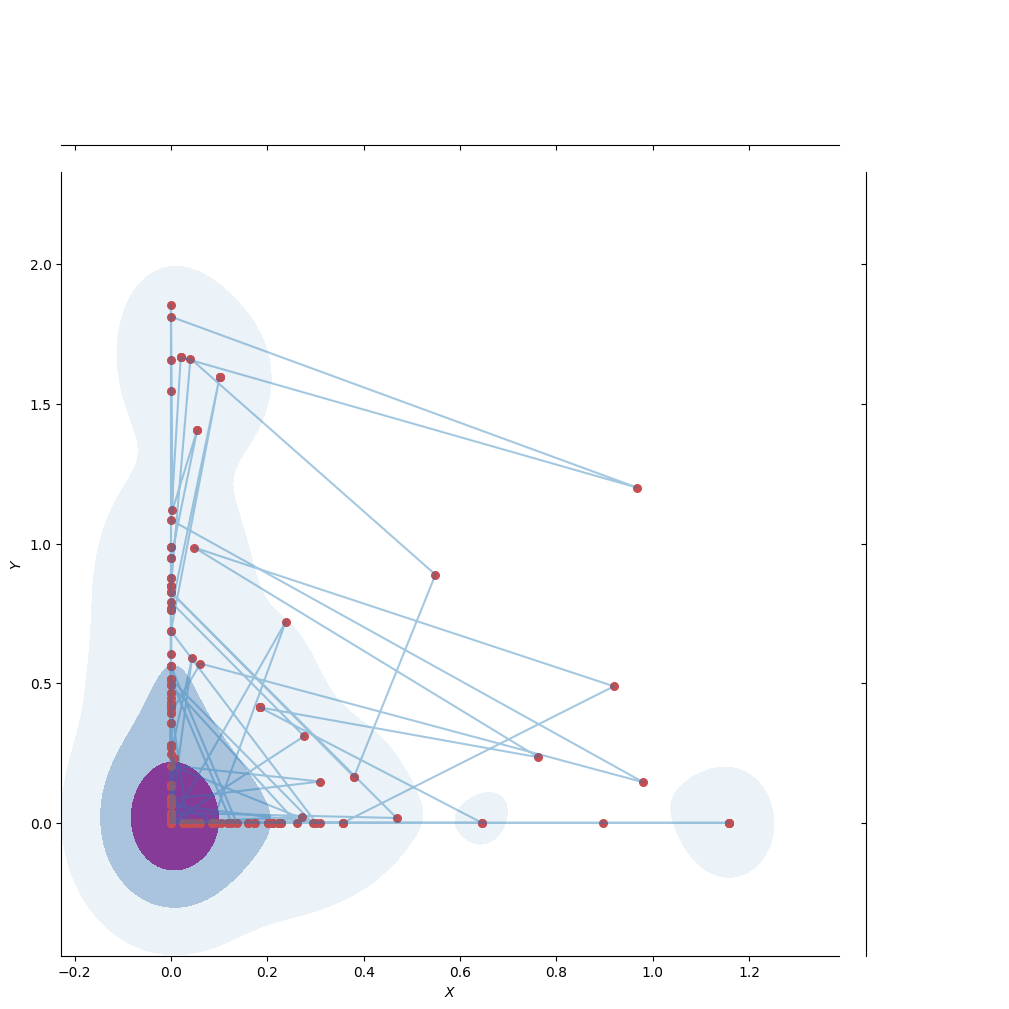

In [24]:
mean = np.array([lambda_x, lambda_y])  # Media
var = np.array([[lambda_x, 0], [0, lambda_y]])  # Varianza, consideramos varianzas independientes

def ptarget(x, y):
    """
    Usar la función de densidad de probabilidad de la distribución bivariada exponencial.
    """
    return bivariate_exponential(np.array([[x]]), np.array([[y]]), lambda_x, lambda_y)[0][0]

def metropolis_hastings(p, n, x0, y0, step):
    """
    Implementación del algoritmo de Metropolis-Hastings.
    """
    x = x0
    y = y0

    points = np.zeros((n, 2))  # Lista inicial de muestras, al momento, con puros ceros

    for i in range(n):

        # Proponer nuevos valores para el estado actual mediante el muestreo Q(x', y' | x, y)
        x_star = max(0, x + np.random.uniform(-step, step))  # Desplazamiento continuo en x, no negativo
        y_star = max(0, y + np.random.uniform(-step, step))  # Desplazamiento continuo en y, no negativo

        # Condición de Metropolis-Hastings
        if np.random.rand() < p(x_star, y_star) / p(x, y):
            x, y = x_star, y_star

        # Se actualiza la lista de muestras
        points[i] = np.array([x, y])

    return points

# Generar las muestras usando Metropolis-Hastings
samples = metropolis_hastings(ptarget, 300, 0, 0, 1)

# Visualizar las muestras generadas
plot_dist(samples[:, 0], samples[:, 1])
plt.savefig('caminantes.png')

# **Distribución Binomial**

**Paso 1.** Defina las variables que intervienen en el modelo.

Se dice que una variable aleatoria $x,y$ tiene una distribución exponencial si su función de densidad de probabilidad está dada por:

**Paso 2.** Formule la distribución de probabilidad de cada variable.

$$
p(x,y)=\binom{n_1}{x}p_1^x(1-p_1)^{n_1-x}*\binom{n_2}{y}p_2^y(1-p_2)^{n_2-y}
$$

**Paso 3.** Enumere la distribución acumulada de probabilidad de cada variable.

$$
F(x,y)=\sum_{i=0}^x\sum_{j=0}^y\binom{n_1}{i}p_1^i(1-p_1)^{n_1-i}*\binom{n_2}{j}p_2^j(1-p_2)^{n_2-j}
$$

**Paso 4.** Establezca el intervalo de números aleatorios correspondiente a cada valor de cada una de las variables.

|  Variable |       x       |       y       |
|-----------|---------------|---------------|
| Intervalo | $\{0,...,n\}$ | $\{0,...,n\}$ |

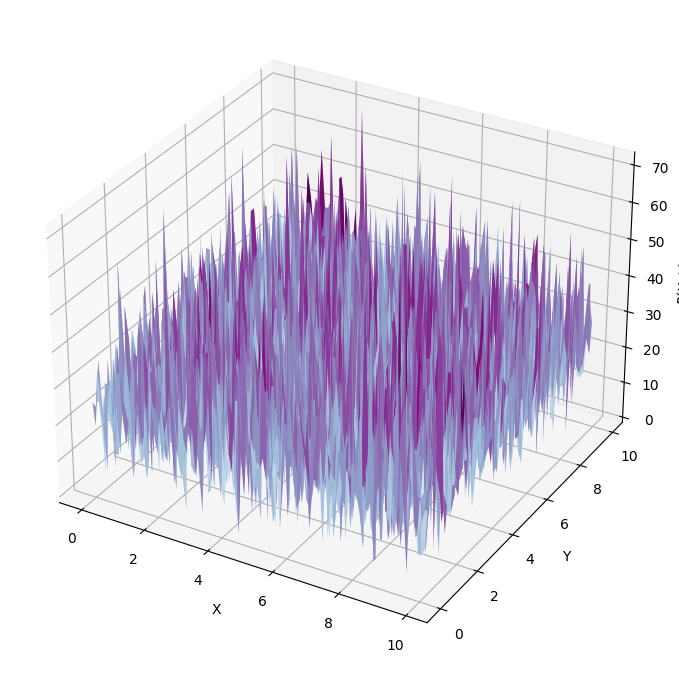

In [25]:
# PASO 5: Genere números aleatorios.
# PASO 6: Simule la función

def bivariate_binomial(X, Y, n_x=10, p_x=0.5, n_y=10, p_y=0.5):
    """
    Distribución binomial bivariada para las matrices *X* y *Y*.
    """
    Z = np.zeros(X.shape)  # Matriz para almacenar las probabilidades

    # Calcular la probabilidad para cada par (x, y) en una distribución binomial
    for i in range(len(X)):
        for j in range(len(Y)):
            if X[i, j] >= 0 and Y[i, j] >= 0:  # Asegurarse de que x y y son no negativos
                # Generar valores binomiales para X y Y
                Z[i, j] = np.random.binomial(n_x, p_x) * np.random.binomial(n_y, p_y)
    return Z

def plot_dist(x, y):
    ''' Entorno de graficación que utilizamos frecuentemente para visualizar los
    algoritmos de muestreo.'''

    sns.set_style('white')  # Estilo de la gráfica
    plt.rcdefaults()  # Configuración por defecto de Matplotlib

    # Graficar el contorno
    g = sns.JointGrid(x=x, y=y, height=10).plot_joint(sns.kdeplot, n_levels=4, cmap="BuPu", shade=True, shade_lowest=False)

    # Agregar gráfico de dispersión de los datos
    g = g.plot_joint(plt.scatter, c="r", s=30, linewidth=1)
    plt.plot(x, y, linestyle='-', marker='', alpha=0.4)

    # Configurar etiquetas de los ejes
    g.set_axis_labels("$X$", "$Y$")

def traceplot(x):
    ''' Gráfico de trazas en la dimensión x con la media acumulativa (r)
    y la media real (--)'''
    sns.tsplot(x)  # Gráfico de la serie temporal
    l = list(np.cumsum(x))  # Sumar acumulativamente los valores
    nl = [v/i for i, v in enumerate(l, 1)]  # Calcular la media acumulativa
    plt.plot(nl, 'r')  # Graficar la media acumulativa
    plt.axhline(y=0.0, color='k', linestyle='--')  # Línea horizontal en 0
    plt.ylabel('x')
    plt.xlabel('Iteración')

def autocorrelation_plot(x, l):
    ''' Grafica la autocorrelación de x hasta un retraso = l '''
    plt.acorr(x - np.mean(x), maxlags=l, normed=True, usevlines=False)  # Graficar autocorrelación
    plt.xlim((0, 100))  # Limitar el eje x
    plt.ylabel('Autocorrelación')
    plt.xlabel('Retraso')

# Definir parámetros para la distribución binomial bivariada
n_x = 10
p_x = 0.5
n_y = 10
p_y = 0.5

# Crear la cuadrícula para el gráfico 3D
x = np.arange(0, 10, 0.1)  # Rango para los valores de X
y = np.arange(0, 10, 0.1)  # Rango para los valores de Y
X, Y = np.meshgrid(x, y)  # Crear la cuadrícula de coordenadas

# Generar la distribución binomial bivariada
Z = bivariate_binomial(X, Y, n_x, p_x, n_y, p_y)

# Graficar la superficie en 3D
fig = plt.figure(figsize=(12, 8.5))  # Tamaño de la figura
ax = fig.add_subplot(111, projection='3d')  # Crear un eje 3D
ax.plot_surface(X, Y, Z, cmap='BuPu')  # Graficar la superficie

# Configurar etiquetas de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('$P(X,Y)$')
plt.show()  # Mostrar la gráfica

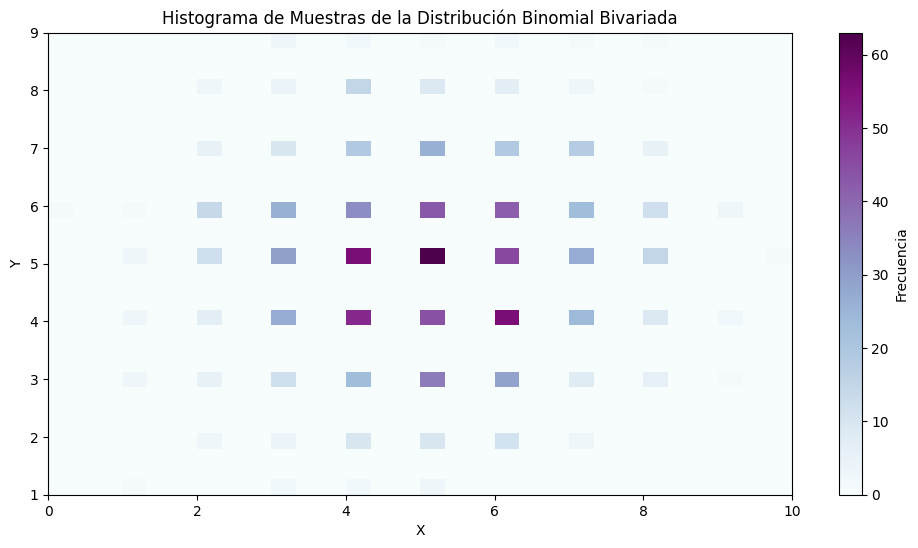

In [26]:
# PASO 7. Obtenga la gráfica y el histograma.

# Generar muestras aleatorias de la distribución binomial bivariada
num_samples = 1000  # Número de muestras

# Generar muestras independientes de la distribución binomial
X_samples = np.random.binomial(n_x, p_x, num_samples)  # Muestras para X
Y_samples = np.random.binomial(n_y, p_y, num_samples)  # Muestras para Y

# Crear un histograma de las muestras
plt.figure(figsize=(12, 6))
plt.hist2d(X_samples, Y_samples, bins=[30, 30], cmap='BuPu')  # Histograma 2D
plt.colorbar(label='Frecuencia')  # Barra de color para la frecuencia
plt.title('Histograma de Muestras de la Distribución Binomial Bivariada')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()  # Mostrar el histograma

In [27]:
# PASO 8. Calcule la media del área bajo la curva de la función y su desviación estándar.

# Cálculo de la media y la desviación estándar usando NumPy
mean_X_numpy = np.mean(X_samples)
std_dev_X_numpy = np.std(X_samples, ddof=1)  # ddof=1 para obtener la desviación estándar muestral

mean_Y_numpy = np.mean(Y_samples)
std_dev_Y_numpy = np.std(Y_samples, ddof=1)

# Mostrar resultados
print(f'Media de X (NumPy): {mean_X_numpy:.2f}')
print(f'Desviación estándar de X (NumPy): {std_dev_X_numpy:.2f}')
print(f'Media de Y (NumPy): {mean_Y_numpy:.2f}')
print(f'Desviación estándar de Y (NumPy): {std_dev_Y_numpy:.2f}')

Media de X (NumPy): 4.96
Desviación estándar de X (NumPy): 1.59
Media de Y (NumPy): 4.94
Desviación estándar de Y (NumPy): 1.53


<ipython-input-28-5bf9c68e5bd6>:40: RuntimeWarning: divide by zero encountered in scalar divide
  if np.random.rand() < p(x_star, y_star) / p(x, y):
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


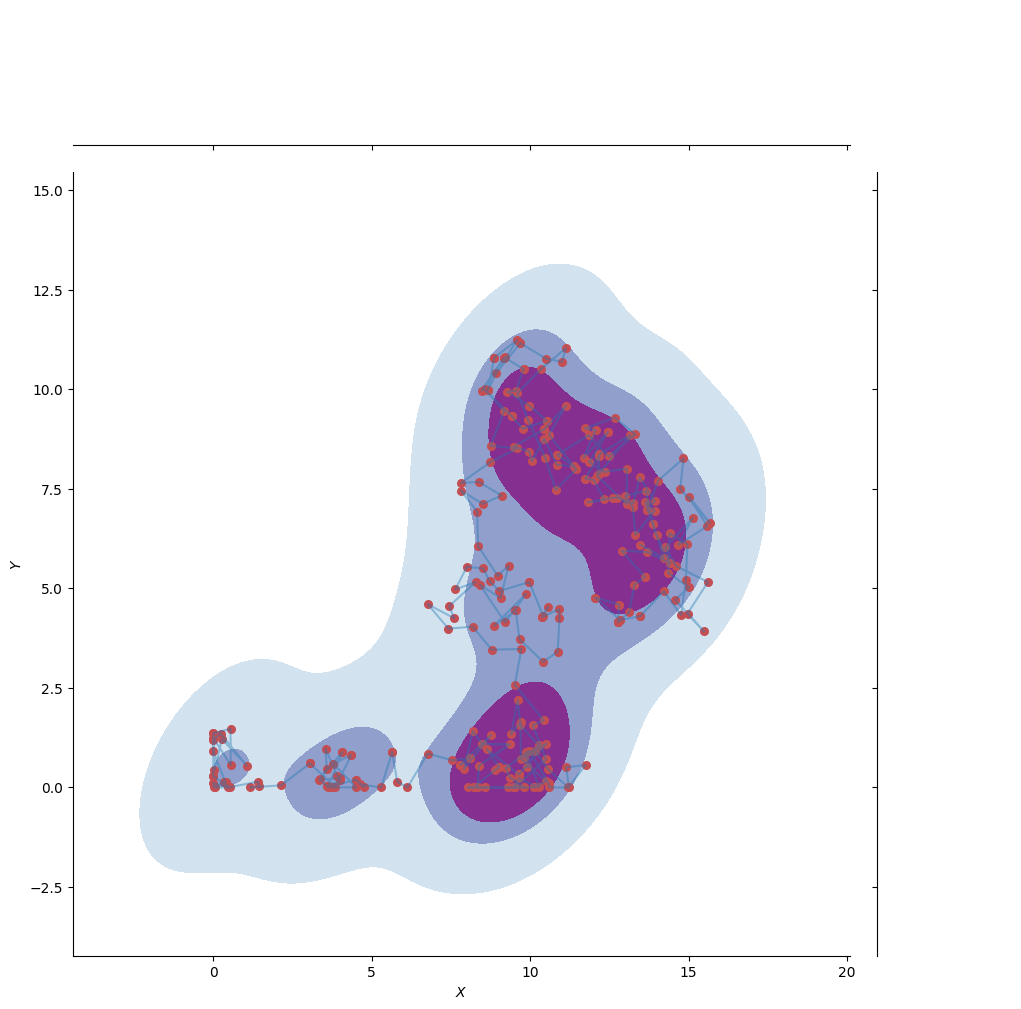

In [28]:
# Media y varianza para la distribución binomial bivariada
mean = np.array([n_x * p_x, n_y * p_y])  # Media
var = np.array([[n_x * p_x * (1 - p_x), 0], [0, n_y * p_y * (1 - p_y)]])  # Varianza, consideramos varianzas independientes

def bivariate_binomial(X, Y, n_x=10, p_x=0.5, n_y=10, p_y=0.5):
    """
    Distribución binomial bivariada para las matrices *X* y *Y*.
    """
    Z = np.zeros(X.shape)  # Matriz para almacenar las probabilidades

    # Calcular la probabilidad para cada par (x, y)
    for i in range(len(X)):
        for j in range(len(Y)):
            if X[i, j] >= 0 and Y[i, j] >= 0:  # Asegurarse de que x y y son no negativos
                Z[i, j] = np.random.binomial(n_x, p_x) * np.random.binomial(n_y, p_y)
    return Z

def ptarget(x, y):
    """
    Usar la función de densidad de probabilidad de la distribución bivariada binomial.
    """
    return bivariate_binomial(np.array([[x]]), np.array([[y]]), n_x, p_x, n_y, p_y)[0][0]

def metropolis_hastings(p, n, x0, y0, step):
    """
    Implementación del algoritmo de Metropolis-Hastings.
    """
    x = x0
    y = y0

    points = np.zeros((n, 2))  # Lista inicial de muestras, al momento, con puros ceros

    for i in range(n):

        # Proponer nuevos valores para el estado actual mediante el muestreo Q(x', y' | x, y)
        x_star = max(0, x + np.random.uniform(-step, step))  # Desplazamiento continuo en x, no negativo
        y_star = max(0, y + np.random.uniform(-step, step))  # Desplazamiento continuo en y, no negativo

        # Condición de Metropolis-Hastings
        if np.random.rand() < p(x_star, y_star) / p(x, y):
            x, y = x_star, y_star

        # Se actualiza la lista de muestras
        points[i] = np.array([x, y])

    return points

# Generar las muestras usando Metropolis-Hastings
samples = metropolis_hastings(ptarget, 300, 0, 0, 1)

# Visualizar las muestras generadas
plot_dist(samples[:, 0], samples[:, 1])
plt.savefig('caminantes_binomial.png')